# Load the data

In [3]:
"""
Adapted to Hebrew from
https://ui.neptune.ai/neptune-ai/eda-nlp-tools/n/9-0-eda-for-nlp-template-e8339407-5fc0-47cf-a304-994c0e2a689e/a9606b25-9906-439b-b141-165a162a874d
"""

'\nAdapted to Hebrew from\nhttps://ui.neptune.ai/neptune-ai/eda-nlp-tools/n/9-0-eda-for-nlp-template-e8339407-5fc0-47cf-a304-994c0e2a689e/a9606b25-9906-439b-b141-165a162a874d\n'

## Exploring the Kol Zhut Dataset

In [2]:
import pandas as pd
%matplotlib inline
import gzip
from tqdm import tqdm
import zipfile

# with gzip.open("../data/kolzhut_texts/kolzhut_raw_comp.tsv.gz", "rb") as f:
#     data= pd.read_csv(f, sep='\t', nrows=1000)
# print(data.head())

In [15]:
in_file=zipfile.ZipFile("C:/Users/fyuva/projects/2022/hebrew-nlp-workshop/data/foodWalla.zip")
orig_files=in_file.namelist()
data_lst=[[n, in_file.read(n).decode("utf8")] for n in orig_files]
df=pd.DataFrame(data_lst, columns=["name","text"])
print(df.head())
print(df.info())

       name                                               text
0   100.txt  \n\t\t\t\t\t\tלביבות כרובית, אגוזים ופתיתים שי...
1  1000.txt  \n\t\t\t\t\t\tסופגניית באונטי במילוי קרם קוקוס...
2  1001.txt  \n\t\t\t\t\t\tסופגניית הבסיס הקלאסית\t\t\t\t\t...
3  1002.txt  \n\t\t\t\t\t\tחורף מתוק: עוגת קצף נוגט ואגוזים...
4  1003.txt  \n\t\t\t\t\t\tעל כריסמס וקובה: שוק חג מולד בנצ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1050 non-null   object
 1   text    1050 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB
None


In [16]:
def get_hebrew_stopwords():
    stop_path="../data/heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
        print(res[:4])
    return res

In [17]:
TEXT_COLUMN = 'text'
text = df[TEXT_COLUMN]
stop = set(get_hebrew_stopwords())

['את', 'לא', 'של', 'אני']


# Look at  a single document

In [44]:
def print_right_aligned(s, width=120):
    print(f"{s:<{width}}")
    
def print_right_aligned_ser(ser):
    for s in ser:
        print_right_aligned(s)

C:\Users\fyuva\Anaconda3\envs\hebnlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
rows=[r.strip() for r in text[2].split("\n")]
print_right_aligned_ser(rows)

                                                                                                                        
סופגניית הבסיס הקלאסית                                                                                                  
לפני שמשתעשעים ומשתגעים עם מילויים וציפויים מקוריים לסופגניות, מגיש הקונדיטור ענר צלאל מדלאל בתל אביב מתכון בסיסי לבצק, שתמיד מצליח
                                                                                                                        
חומרים ל-24 סופגניות:                                                                                                   
500 גרם קמח שטיבל 2 (קמח לחם)                                                                                           
100 גרם סוכר                                                                                                            
1 כפית מלח                                                                                                              
25 גרם שמרים טריים   

C:\Users\fyuva\Anaconda3\envs\hebnlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Text Statistics

### Character Length Histogram

In [18]:
def plot_character_length_histogram(text):
    text.str.len().\
        hist()

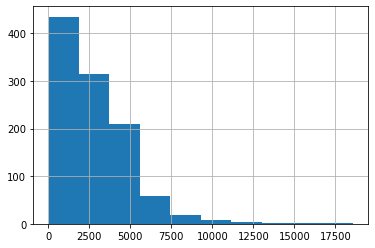

In [19]:
plot_character_length_histogram(text)

### Word Number Histogram

In [ ]:
def plot_word_number_histogram(text):
    text.str.split().map(lambda x: len(x)).hist()

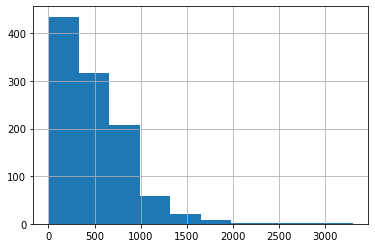

In [21]:
plot_word_number_histogram(text)

### Top Stopwords Barchart

In [22]:
import matplotlib.pyplot as plt
import numpy as np
#from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text, stop):
    #stop=set(stopwords.words('english'))
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    x=[w[::-1] for w in x]
    plt.bar(x,y)

In [23]:
def invert_words(words):
    return [w[::-1] for w in words]

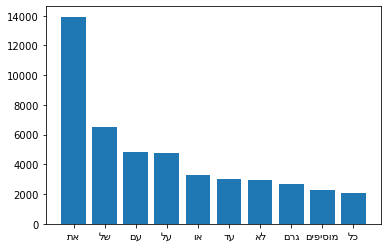

In [24]:
plot_top_stopwords_barchart(text, stop)

### Top Non-Stopwords Barchart

In [25]:
import seaborn as sns
#from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text, stop):
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=invert_words(x))

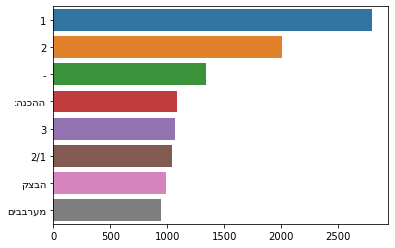

In [26]:
plot_top_non_stopwords_barchart(text, stop)

# Top N-grams Barchart

In [27]:
import seaborn as sns
import numpy as np
#from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    #stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=invert_words(x))

### Bigrams

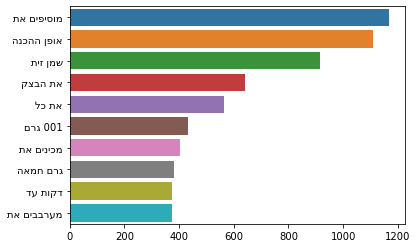

In [28]:
plot_top_ngrams_barchart(text,2)

### Trigrams

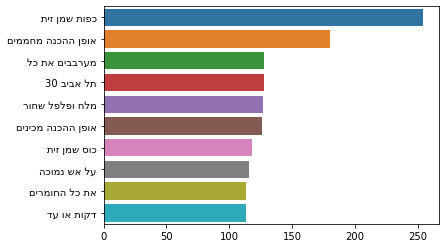

In [29]:
plot_top_ngrams_barchart(text,3)

# Topic Modelling LDA visualization

In [30]:
import numpy as np
import nltk
#from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text, stop):
    #nltk.download('stopwords')    
    #top=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 6, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [31]:
lda_model, bow_corpus, dic = get_lda_objects(text, stop)
lda_model.show_topics()

C:\Users\fyuva\Anaconda3\envs\hebnlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.003*"הבצק" + 0.002*"מערבבים" + 0.002*"מכינים" + 0.002*"חמאה" + 0.002*"1/2" + 0.002*"הסוכר" + 0.002*"וניל" + 0.002*"מניחים" + 0.002*"חלב" + 0.002*"חומרים"'),
 (1,
  '0.007*"הבצק" + 0.006*"1/2" + 0.005*"מערבבים" + 0.005*"חומרים" + 0.005*"חמאה" + 0.005*"מניחים" + 0.004*"מחממים" + 0.004*"אבקת" + 0.004*"אפייה" + 0.004*"מעלות"'),
 (2,
  '0.006*"זית" + 0.004*"מנות" + 0.003*"עלי" + 0.003*"חומרים" + 0.003*"ופלפל" + 0.003*"אורז" + 0.003*"הבשר" + 0.003*"1/2" + 0.003*"עגבניות" + 0.002*"בשר"'),
 (3,
  '0.003*"היין" + 0.002*"תירס" + 0.002*"המקום" + 0.002*"יין" + 0.002*"התירס" + 0.002*"טרי" + 0.001*"בשר" + 0.001*"שקלים" + 0.001*"המסעדה" + 0.001*"למצוא"'),
 (4,
  '0.004*"זית" + 0.003*"מנות" + 0.003*"עלי" + 0.003*"1/2" + 0.002*"חומרים" + 0.002*"עגבניות" + 0.002*"בשר" + 0.002*"לימון" + 0.002*"כוסברה" + 0.002*"מערבבים"'),
 (5,
  '0.013*"שקלים" + 0.003*"יין" + 0.003*"כשר" + 0.003*"מנות" + 0.002*"המסעדה" + 0.002*"יינות" + 0.002*"הבצק" + 0.002*"בצק" + 0.002*"רחוב" + 0.002*"המקום"')]

In [32]:
plot_lda_vis(lda_model, bow_corpus, dic)

C:\Users\fyuva\Anaconda3\envs\hebnlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.160985  0.045750       1        1  35.758684
2     -0.006340 -0.120256       2        1  19.851611
5      0.113584  0.074535       3        1  15.471478
0     -0.067446  0.054020       4        1  10.415871
4     -0.018647 -0.058922       5        1   9.858001
3      0.139834  0.004873       6        1   8.644355, topic_info=       Term         Freq        Total Category  logprob  loglift
1117  שקלים   809.000000   809.000000  Default  30.0000  30.0000
274    הבצק  1106.000000  1106.000000  Default  29.0000  29.0000
40      זית   943.000000   943.000000  Default  28.0000  28.0000
6567    כשר   230.000000   230.000000  Default  27.0000  27.0000
258    אבקת   567.000000   567.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
515     לצד    24.589889   190.622281   Topic6  -7.0900   0.4003
1750    עלי    28.755744   595.466490   Topic6  -6.9335  -0.5822
629   בישול    23.507899   245.824947   Topic6  -7.1350   0.1010
91      סלט    23.224840   305.427105   Topic6  -7.1471  -0.1282
947   מומלץ    21.963145   264.170142   Topic6  -7.2030  -0.0390

[522 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
34804      6  0.873761   0404
0          1  0.654703    1/2
0          2  0.171756    1/2
0          3  0.013851    1/2
0          4  0.073873    1/2
...      ...       ...    ...
2684       3  0.396300    תרד
2684       4  0.018291    תרד
2684       5  0.024388    תרד
2684       6  0.024388    תרד
6221       1  0.981164  תרסיס

[1416 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 6, 1, 5, 4])

# Wordcloud

In [33]:
import matplotlib.pyplot as plt
import numpy as np
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text, stop):
    #nltk.download('stopwords')
    #stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            #words=[lem.lemmatize(w) for w in words if len(w)>2]
            words=invert_words(words)
            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        font_path='arial',
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

C:\Users\fyuva\Anaconda3\envs\hebnlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\fyuva\Anaconda3\envs\hebnlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


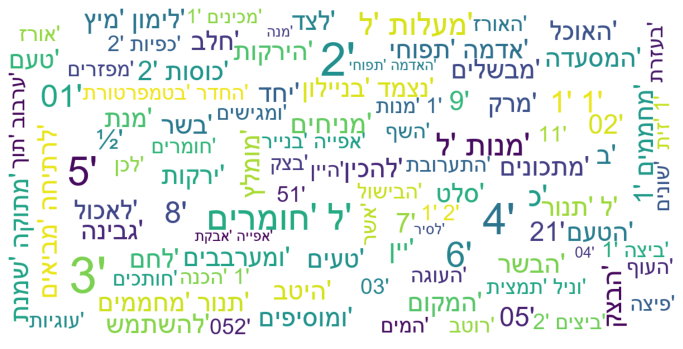

In [34]:
plot_wordcloud(text,stop)